# 🧪 EDA and Predictive Modeling for Retail Superstore Data

This notebook explores sales, discount, and profit trends and builds a predictive model to flag loss-prone transactions.

In [5]:
# 📥 Imports and Dataset Loading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('C:/data/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
# 📊 Basic Data Overview
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None
        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.85800

In [7]:
# 🧹 Preprocessing
df['Is_Loss'] = (df['Profit'] < 0).astype(int)
df['Discount Bin'] = pd.cut(df['Discount'], bins=[0, 0.1, 0.2, 0.3, 0.5, 0.8], 
                            labels=['0-10%', '10-20%', '20-30%', '30-50%', '50-80%'])

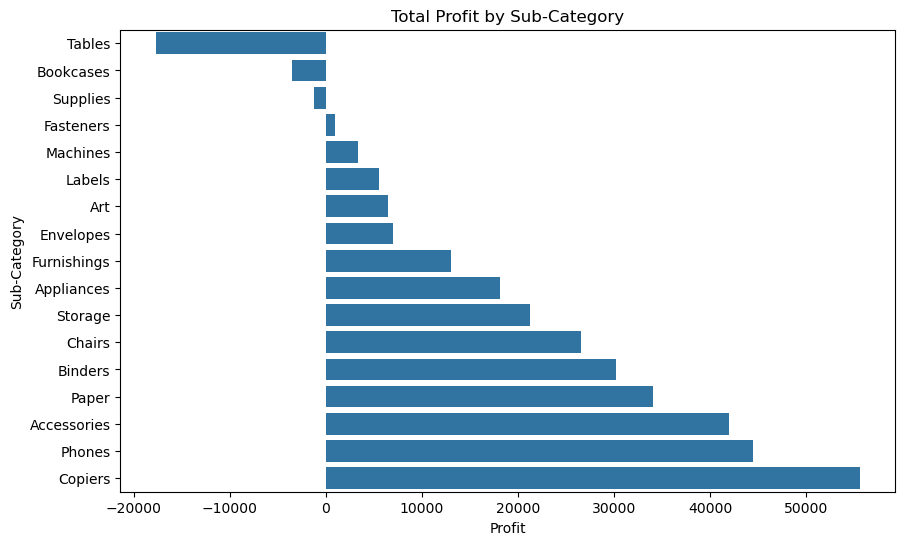

In [8]:
# 📈 Profit by Sub-Category
plt.figure(figsize=(10, 6))
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
sns.barplot(x=subcat_profit.values, y=subcat_profit.index)
plt.title("Total Profit by Sub-Category")
plt.xlabel("Profit")
plt.ylabel("Sub-Category")
plt.show()

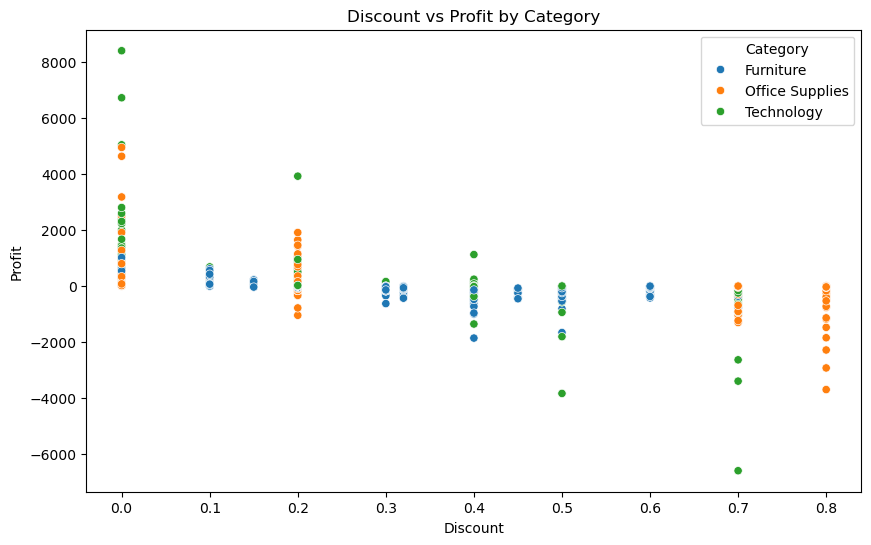

In [9]:
# 🔍 Discount vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Discount vs Profit by Category")
plt.show()

In [10]:
# 🔮 Predictive Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Features and Target
X = df[['Sales', 'Discount', 'Quantity']]
y = df['Is_Loss']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1590   46]
 [  64  299]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1636
           1       0.87      0.82      0.84       363

    accuracy                           0.94      1999
   macro avg       0.91      0.90      0.91      1999
weighted avg       0.94      0.94      0.94      1999



✅ This notebook provides a solid foundation for building a real-time dashboard and conducting further analytics.

In [11]:
# Generate the Streamlit dashboard app script

dashboard_script = '''
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("../data/SampleSuperstore.csv")

# Preprocessing
df['Is_Loss'] = (df['Profit'] < 0).astype(int)

# Sidebar filters
st.sidebar.header("Filters")
region = st.sidebar.multiselect("Select Region", df['Region'].unique(), default=df['Region'].unique())
category = st.sidebar.multiselect("Select Category", df['Category'].unique(), default=df['Category'].unique())
discount_range = st.sidebar.slider("Discount Range", float(df['Discount'].min()), float(df['Discount'].max()), (0.0, 0.8))

# Filtered data
filtered_df = df[(df['Region'].isin(region)) & 
                 (df['Category'].isin(category)) & 
                 (df['Discount'] >= discount_range[0]) & 
                 (df['Discount'] <= discount_range[1])]

st.title("📊 Superstore Real-Time Dashboard")

# Metrics
st.metric("Total Sales", f"${filtered_df['Sales'].sum():,.2f}")
st.metric("Total Profit", f"${filtered_df['Profit'].sum():,.2f}")
st.metric("Average Discount", f"{filtered_df['Discount'].mean():.2%}")

# Profit by Sub-Category
st.subheader("Profit by Sub-Category")
fig1, ax1 = plt.subplots()
subcat_profit = filtered_df.groupby('Sub-Category')['Profit'].sum().sort_values()
sns.barplot(x=subcat_profit.values, y=subcat_profit.index, ax=ax1)
st.pyplot(fig1)

# Discount vs Profit Scatter
st.subheader("Discount vs Profit")
fig2, ax2 = plt.subplots()
sns.scatterplot(data=filtered_df, x='Discount', y='Profit', hue='Category', ax=ax2)
st.pyplot(fig2)

# Predictive Loss Alerts
st.subheader("Loss Risk Prediction Alerts")
features = ['Sales', 'Discount', 'Quantity']
X = df[features]
y = df['Is_Loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
filtered_df['Predicted_Loss'] = model.predict(filtered_df[features])
alerts = filtered_df[filtered_df['Predicted_Loss'] == 1][['Sub-Category', 'Sales', 'Discount', 'Profit', 'Region', 'Segment']]
st.dataframe(alerts)
'''